In [47]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [48]:
# Median Yearly Salary vs. Job Count (2.15.1) - Problem
# Matplotlib Scatter Plots
# Problem Statement:
# Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
# To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
# Annotate each point with the job title name.

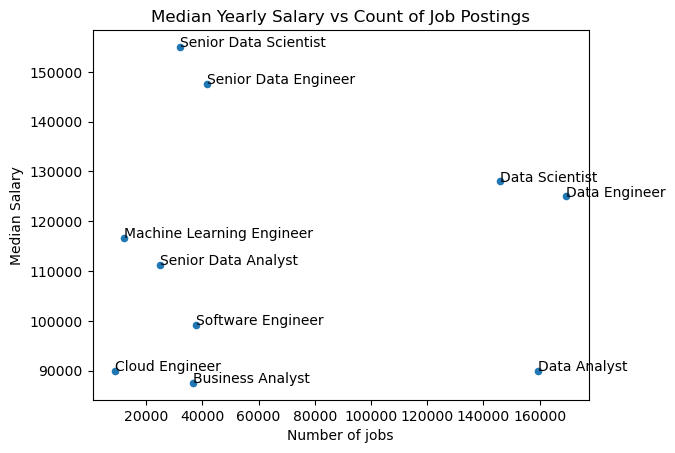

In [49]:
## In this we are grouping job_title and finding median salary and at the same time number of 
## job counts
df_dd = df.groupby('job_title_short').agg(
    job_count = ('job_title_short', 'count'),
    median = ('salary_year_avg', 'median')
)

## Sorting by median column
df_dd = df_dd.sort_values(by='median').head(10)


df_dd.plot(kind='scatter', x='job_count', y='median')

## Here we have to give the index of each point that correspond with the particular row with
## job title

for i, txt in enumerate(df_dd.index):
    plt.text(df_dd['job_count'].iloc[i], df_dd['median'].iloc[i], txt)

plt.xlabel('Number of jobs')
plt.ylabel('Median Salary')
plt.title('Median Yearly Salary vs Count of Job Postings')
plt.show()

In [50]:
#  Top 7 Countries by Median Yearly Salary vs Job Count (2.15.2) - Problem
# Matplotlib Scatter Plots
# Problem Statement:
# Create a scatter plot to visualize the relationship between the number of job postings and 
# median yearly salary for the top 7 countries based on highest number of job postings.
#  Annotate each point with the country's name.

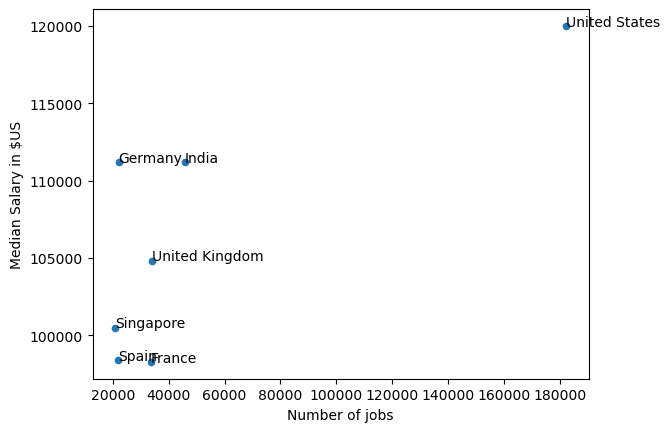

In [51]:
df_two = df.copy()
# df_two.info()


## Here we are grouping Job titles and median salary by top 7 countries that have
## most number of jobs
df_two = df_two.groupby('job_country').agg(
    job_posting=('job_title_short','count'),
    median_salary=('salary_year_avg','median')
)


## Here we are sorting Values of the dataframe by job posting and storing top 7 values
df_two = df_two.sort_values(by='job_posting',ascending=False).head(7)

## Plotting a Scater graph
df_two.plot(kind='scatter' , x ='job_posting', y='median_salary')

## Annotating name on each data point
for i, txt in enumerate(df_two.index):
    plt.text(df_two['job_posting'].iloc[i], df_two['median_salary'].iloc[i], txt)

plt.ylabel('Median Salary in $US')
plt.xlabel('Number of jobs')
plt.show()

In [52]:
#  Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3) - Problem
# Matplotlib Scatter Plots
# Problem Statement:
# Create a scatter plot to visualize the relationship between the average yearly 
# salary and the job count filtering a DataFrame for:

# Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
# United States for the job_country
# 'Full-time' and 'Contractor' for the job_schedule_type
# Remove roles that do not have any yearly salary data.
# Combine the job_title_short and job_schedule_type into one column (called job_title_type)
#  in the newly created DataFrame to use as the labels for the plot.

# For the plot use a for loop to cycle through the unique values in job_title_type and
# plot using the plt.scatter() function, specifying the label of job_title_type.

# Ensure the legend is appearing.
# Label the plot's axis and title appropriately.
# Code Needed:

In [53]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_three = df.copy()
df_three=df_three.dropna(subset='salary_year_avg')
df_three=df_three[df_three['job_country']=='United States']
df_three=df_three[df_three['job_schedule_type'].isin(['Full-time','Contractor'])]
df_three=df_three[df_three['job_title_short'].isin(target_job_titles)]

In [54]:
df_three.job_title_short.unique()

array(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype=object)

In [55]:
df_g = df_three.groupby(['job_title_short','job_schedule_type']).agg(
    job_count = ('job_title_short','count'),
    median = ('salary_year_avg', 'mean')
).dropna()

df_g.reset_index(inplace=True)


df_g["job_title_type"] = df_g["job_title_short"] + " - " + df_g["job_schedule_type"]





,job_title_short,job_schedule_type,job_count,median,job_title_type
0,Data Analyst,Contractor,104,87038.643104,Data Analyst - Contractor
1,Data Analyst,Full-time,3657,95152.524262,Data Analyst - Full-time
2,Data Engineer,Contractor,71,118100.734375,Data Engineer - Contractor
3,Data Engineer,Full-time,2678,133779.530031,Data Engineer - Full-time
4,Data Scientist,Contractor,59,118689.025821,Data Scientist - Contractor
5,Data Scientist,Full-time,3819,140146.416976,Data Scientist - Full-time


,job_title_short,job_schedule_type,job_count,median,job_title_type
0,Data Analyst,Contractor,104,87038.643104,Data Analyst - Contractor
1,Data Analyst,Full-time,3657,95152.524262,Data Analyst - Full-time
2,Data Engineer,Contractor,71,118100.734375,Data Engineer - Contractor
3,Data Engineer,Full-time,2678,133779.530031,Data Engineer - Full-time
4,Data Scientist,Contractor,59,118689.025821,Data Scientist - Contractor
5,Data Scientist,Full-time,3819,140146.416976,Data Scientist - Full-time


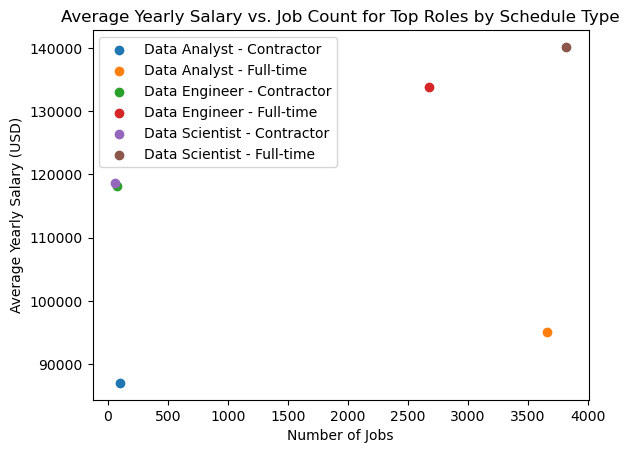

In [61]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_three = df.copy()
df_three=df_three.dropna(subset='salary_year_avg')
df_three=df_three[df_three['job_country']=='United States']
df_three=df_three[df_three['job_schedule_type'].isin(['Full-time','Contractor'])]
df_three=df_three[df_three['job_title_short'].isin(target_job_titles)]

df_g = df_three.groupby(['job_title_short','job_schedule_type']).agg(
    job_count = ('job_title_short','count'),
    median = ('salary_year_avg', 'mean')
).dropna()

df_g.reset_index(inplace=True)


df_g["job_title_type"] = df_g["job_title_short"] + " - " + df_g["job_schedule_type"]



for x in df_g['job_title_type'].unique():
    dataframe = df_g[df_g['job_title_type']==x]
    plt.scatter(dataframe['job_count'], dataframe['median'], label = x)


plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

In [59]:
stats

,job_schedule_type,job_title_short,mean_salary_year_avg,job_count,job_title_type
0,Contractor,Data Analyst,87038.643104,104,Data Analyst - Contractor
1,Contractor,Data Engineer,118100.734375,71,Data Engineer - Contractor
2,Contractor,Data Scientist,118689.025821,59,Data Scientist - Contractor
3,Full-time,Data Analyst,95152.524262,3657,Data Analyst - Full-time
4,Full-time,Data Engineer,133779.530031,2678,Data Engineer - Full-time
5,Full-time,Data Scientist,140146.416976,3819,Data Scientist - Full-time


In [ ]:
df_g

,job_title_short,job_count,median,job_title_type
0,Data Analyst,3761,90000.0,NaN
1,Data Engineer,2749,125000.0,NaN
2,Data Scientist,3878,130000.0,NaN
